In [3]:
import os 
#lets change the path wit os first (to save file in data sets directory)
os.chdir(r'C:\Users\Eduardo\Documents\CARRERA\Udemy\deep_learning\course_1\week2\logistic_regression_as_a_nn')
print(os.getcwd()) #lets make sure we are in the correct directory

C:\Users\Eduardo\Documents\CARRERA\Udemy\deep_learning\course_1\week2\logistic_regression_as_a_nn


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

In [5]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


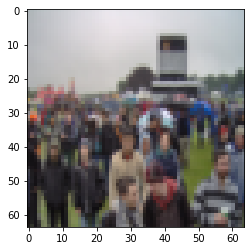

In [6]:
 #Example of a picture
index = 100
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [7]:
# Data descrpition
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [9]:
#pixel normalization
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [10]:
# functions
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

def propagate(w, b, X):
    Z=W.T.dot(X)+b
    A=sigmoid(Z)
    return A
def predict(w, b, X,Y):
    Z=W.T.dot(X)+b
    prediction=sigmoid(Z)
    prediction=(prediction >= 0.5).astype(int)
    accuracy=(prediction==Y).astype(int).sum()/m*100
    return prediction,accuracy
    

In [11]:
iteration =  2000
X=train_set_x
Y=train_set_y
W,b=initialize_with_zeros(X.shape[0])
m=X.shape[1]
alfa = 0.005
costs = []
it=[]
for i in range(iteration):
    # feed forward
    Z=W.T.dot(X)+b
    A=sigmoid(Z)
    
    # derivate
    dz = A-Y
    dw = 1/m*np.dot(X,dz.T)
    db = 1/m*np.sum(dz)
    
    #Gradient descent
    W =  W - alfa*dw
    b =  b - alfa*db
    
    if i % 100 == 0:
        it.append(i)
        cost =(-1/m) * np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)  ) 
        costs.append(cost)
   
    

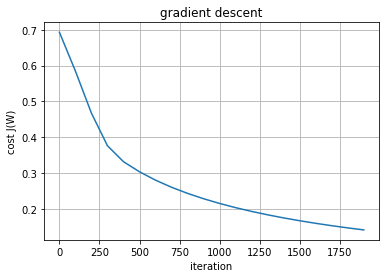

In [12]:
plt.plot(it,costs)
plt.title("gradient descent")
plt.xlabel("iteration")
plt.ylabel("cost J(W)")
plt.grid()
plt.show()

In [13]:
Z=W.T.dot(X)+b
prediction_train=sigmoid(Z)
prediction_train=(prediction_train >= 0.5).astype(int)
#prediction_train
accuracy_train=(prediction_train==Y).astype(int).sum()/m*100

In [14]:
mt=test_set_x.shape[1]
Z=W.T.dot(test_set_x)+b
prediction_test=sigmoid(Z)
prediction_test=(prediction_test >= 0.5).astype(int)
#prediction_test
accuracy_test=(prediction_test==test_set_y ).astype(int).sum()/mt*100

In [15]:
print("Accuracy on Train data:",accuracy_train,"%\nAccuaracy on Test data:",accuracy_test,"%")

Accuracy on Train data: 99.04306220095694 %
Accuaracy on Test data: 70.0 %


## Performance on Train data

y = [1], it's a 'cat' picture. prediction: 1
1 is a cat
prediction was right


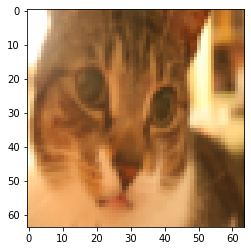

In [16]:
index = 200
if index >= prediction_train.shape[1]:
    print("choose a number that is inside the data set,","number of data:", prediction_train.shape[1])
else:
    plt.imshow(train_set_x_orig[index])
    print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.",
      "prediction:", prediction_train.reshape(1,-1)[0,index])
    
    if prediction_train.reshape(1,-1)[0,index] == 1:
        print("1 is a cat")
    else:
        print("0  is a non cat")
        
    if  prediction_train.reshape(1,-1)[0,index] == (train_set_y[:, index]).astype(int):
        print("prediction was right")
    else:
        print("prediction is wrong")

## Performance on Test data

y = [1], it's a 'cat' picture. prediction: 0
0  is a non cat
prediction is wrong


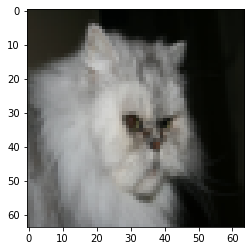

In [17]:
index = 10
if index >= prediction_test.shape[1]:
    print("choose a number that is inside the data set,","number of data:", prediction_test.shape[1])
else:
    plt.imshow(test_set_x_orig[index])
    print ("y = " + str(test_set_y[:, index]) + ", it's a '" + classes[np.squeeze(test_set_y[:, index])].decode("utf-8") +  "' picture.",
      "prediction:", prediction_test.reshape(1,-1)[0,index])
    
    if prediction_test.reshape(1,-1)[0,index] == 1:
        print("1 is a cat")
    else:
        print("0  is a non cat")
        
    if  prediction_test.reshape(1,-1)[0,index] == (test_set_y[:, index]).astype(int):
        print("prediction was right")
    else:
        print("prediction is wrong")